# 모듈 불러오기

In [1]:
from pycaret.classification import * 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from matplotlib import rc
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline

# 데이터 불러오기

In [3]:
%pwd

'C:\\Users\\ebdl\\캡스톤'

In [4]:
data=pd.read_csv('산불_결측치+임상도1차.csv',encoding='utf-8',index_col=0)

In [5]:
data.head()

,Unnamed: 0.1,날짜,발생지역,주소,경도,위도,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,계절,month,임상도
0,0,2001-01-04,경북,경상북도 영천시 서산동,128.892471,35.979027,0.50,41.8,45.500000,48.600000,48.600000,50.749390,39.662659,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.340828,0.0,0.0,0.0,0.0,0.0,1,D
1,1,2001-01-05,강원,강원도 강릉시 성산면 어흘리,128.780562,37.710108,0.06,45.0,40.100000,48.300000,61.800000,63.900000,39.983037,-3.6,0.0,2.6,-6.6,-5.9,-1.4,-2.600000,0.0,0.0,0.0,0.0,0.0,1,D
2,2,2001-01-03,강원,강원도 홍천군 홍천읍 상오안리,127.814492,37.640889,0.20,44.5,58.900000,68.300000,48.140230,47.979310,39.826104,-8.1,0.0,1.8,-4.8,-7.3,-4.9,-0.200000,0.5,0.0,0.0,0.0,0.0,1,PK
3,3,2001-01-04,부산,부산광역시 사하구 다대동,128.966599,35.052936,0.05,35.4,37.900000,44.100000,29.800000,42.339062,32.888604,-6.1,0.0,8.5,-4.2,0.8,-2.4,-1.000000,0.0,0.0,0.0,0.0,0.0,1,R
4,4,2001-01-01,부산,부산광역시 부산진구 당감동,129.024863,35.168081,0.60,29.8,39.157812,40.301538,40.449231,42.339062,32.888604,0.8,0.0,3.4,3.3,5.8,3.8,3.700000,0.0,0.0,0.0,0.0,0.0,1,D


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10017
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     10018 non-null  int64  
 1   날짜               10018 non-null  object 
 2   발생지역             10018 non-null  object 
 3   주소               10018 non-null  object 
 4   경도               10018 non-null  float64
 5   위도               10018 non-null  float64
 6   피해면적             10018 non-null  float64
 7   상대습도             10018 non-null  float64
 8   상대습도_1days_prev  10018 non-null  float64
 9   상대습도_2days_prev  10018 non-null  float64
 10  상대습도_3days_prev  10018 non-null  float64
 11  상대습도_4days_prev  10018 non-null  float64
 12  실효습도             10018 non-null  float64
 13  기온               10018 non-null  float64
 14  강수량              10018 non-null  float64
 15  풍속               10018 non-null  float64
 16  기온_1days_prev    10018 non-null  float64
 17  기온_2days_pre

In [7]:
data.columns

Index(['Unnamed: 0.1', '날짜', '발생지역', '주소', '경도', '위도', '피해면적', '상대습도',
       '상대습도_1days_prev', '상대습도_2days_prev', '상대습도_3days_prev',
       '상대습도_4days_prev', '실효습도', '기온', '강수량', '풍속', '기온_1days_prev',
       '기온_2days_prev', '기온_3days_prev', '기온_4days_prev', '강수량_1days_prev',
       '강수량_2days_prev', '강수량_3days_prev', '강수량_4days_prev', '계절', 'month',
       '임상도'],
      dtype='object')

In [8]:
data.drop([ '주소','발생지역','경도','위도','Unnamed: 0.1'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10017
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   날짜               10018 non-null  object 
 1   피해면적             10018 non-null  float64
 2   상대습도             10018 non-null  float64
 3   상대습도_1days_prev  10018 non-null  float64
 4   상대습도_2days_prev  10018 non-null  float64
 5   상대습도_3days_prev  10018 non-null  float64
 6   상대습도_4days_prev  10018 non-null  float64
 7   실효습도             10018 non-null  float64
 8   기온               10018 non-null  float64
 9   강수량              10018 non-null  float64
 10  풍속               10018 non-null  float64
 11  기온_1days_prev    10018 non-null  float64
 12  기온_2days_prev    10018 non-null  float64
 13  기온_3days_prev    10018 non-null  float64
 14  기온_4days_prev    10018 non-null  float64
 15  강수량_1days_prev   10018 non-null  float64
 16  강수량_2days_prev   10018 non-null  float64
 17  강수량_3days_pr

In [10]:
data.describe()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,계절,month
count,10018.00000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000
mean,4.31579,50.851961,52.643674,54.738775,55.676797,56.400354,44.149191,9.388058,0.255658,1.936431,8.857241,8.575997,8.402693,8.213995,0.122353,0.327075,0.645681,0.787104,1.423238,4.472050
std,171.65081,12.899128,13.138727,13.643216,14.124908,14.391640,8.799603,7.707772,2.107914,1.210476,7.556679,7.528029,7.568498,7.539581,1.224789,2.370674,3.887521,3.616590,0.867449,2.903882
min,0.00000,10.400000,12.000000,12.900000,14.800000,14.900000,18.425328,-14.700000,0.000000,0.000000,-14.800000,-15.500000,-19.600000,-16.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.03000,42.000000,43.600000,45.150000,45.900000,46.300000,38.151811,3.800000,0.000000,1.200000,3.500000,3.200000,3.025000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.10000,50.400000,52.400000,54.500000,55.420403,55.800000,44.075216,9.200000,0.000000,1.600000,8.500000,8.200000,8.000000,7.900000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000
75%,0.40000,59.400000,61.300000,63.900000,65.000000,66.075000,49.921797,14.700000,0.000000,2.300000,14.000000,13.600000,13.300000,13.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
max,16301.98000,98.100000,99.000000,99.000000,99.100000,100.000000,75.617412,32.100000,63.000000,18.500000,32.100000,32.000000,31.600000,31.100000,69.000000,85.500000,156.500000,78.500000,2.000000,12.000000


#  피처 엔지니어링

## 산불 건주주의기간으로 계절 피처 생성하기

In [11]:
from datetime import datetime

In [12]:
data['날짜']=pd.to_datetime(data['날짜'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10017
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   날짜               10018 non-null  datetime64[ns]
 1   피해면적             10018 non-null  float64       
 2   상대습도             10018 non-null  float64       
 3   상대습도_1days_prev  10018 non-null  float64       
 4   상대습도_2days_prev  10018 non-null  float64       
 5   상대습도_3days_prev  10018 non-null  float64       
 6   상대습도_4days_prev  10018 non-null  float64       
 7   실효습도             10018 non-null  float64       
 8   기온               10018 non-null  float64       
 9   강수량              10018 non-null  float64       
 10  풍속               10018 non-null  float64       
 11  기온_1days_prev    10018 non-null  float64       
 12  기온_2days_prev    10018 non-null  float64       
 13  기온_3days_prev    10018 non-null  float64       
 14  기온_4days_prev    10018 non-null  float

In [14]:
data['계절']=None

In [15]:
for i in range(2001, 2023):
    data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절']=data.loc[(f"{i}-02-01" <= data['날짜']) & (data['날짜'] <= f"{i}-05-15"), '계절'].fillna('봄')
    data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절']=data.loc[(f"{i}-11-01" <= data['날짜']) & (data['날짜'] <= f"{i}-12-15"), '계절'].fillna('가을')
data[['계절']]=data[['계절']].fillna('그외')

In [16]:
data.head(3)

,날짜,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,계절,month,임상도
0,2001-01-04,0.50,41.8,45.5,48.6,48.60000,50.74939,39.662659,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.340828,0.0,0.0,0.0,0.0,그외,1,D
1,2001-01-05,0.06,45.0,40.1,48.3,61.80000,63.90000,39.983037,-3.6,0.0,2.6,-6.6,-5.9,-1.4,-2.600000,0.0,0.0,0.0,0.0,그외,1,D
2,2001-01-03,0.20,44.5,58.9,68.3,48.14023,47.97931,39.826104,-8.1,0.0,1.8,-4.8,-7.3,-4.9,-0.200000,0.5,0.0,0.0,0.0,그외,1,PK


In [17]:
data['계절'].value_counts()

봄     6786
그외    2546
가을     686
Name: 계절, dtype: int64

In [18]:
data.drop(['날짜','month'],axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10018 entries, 0 to 10017
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   피해면적             10018 non-null  float64
 1   상대습도             10018 non-null  float64
 2   상대습도_1days_prev  10018 non-null  float64
 3   상대습도_2days_prev  10018 non-null  float64
 4   상대습도_3days_prev  10018 non-null  float64
 5   상대습도_4days_prev  10018 non-null  float64
 6   실효습도             10018 non-null  float64
 7   기온               10018 non-null  float64
 8   강수량              10018 non-null  float64
 9   풍속               10018 non-null  float64
 10  기온_1days_prev    10018 non-null  float64
 11  기온_2days_prev    10018 non-null  float64
 12  기온_3days_prev    10018 non-null  float64
 13  기온_4days_prev    10018 non-null  float64
 14  강수량_1days_prev   10018 non-null  float64
 15  강수량_2days_prev   10018 non-null  float64
 16  강수량_3days_prev   10018 non-null  float64
 17  강수량_4days_pr

In [20]:
data.describe()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev
count,10018.00000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000,10018.000000
mean,4.31579,50.851961,52.643674,54.738775,55.676797,56.400354,44.149191,9.388058,0.255658,1.936431,8.857241,8.575997,8.402693,8.213995,0.122353,0.327075,0.645681,0.787104
std,171.65081,12.899128,13.138727,13.643216,14.124908,14.391640,8.799603,7.707772,2.107914,1.210476,7.556679,7.528029,7.568498,7.539581,1.224789,2.370674,3.887521,3.616590
min,0.00000,10.400000,12.000000,12.900000,14.800000,14.900000,18.425328,-14.700000,0.000000,0.000000,-14.800000,-15.500000,-19.600000,-16.700000,0.000000,0.000000,0.000000,0.000000
25%,0.03000,42.000000,43.600000,45.150000,45.900000,46.300000,38.151811,3.800000,0.000000,1.200000,3.500000,3.200000,3.025000,2.900000,0.000000,0.000000,0.000000,0.000000
50%,0.10000,50.400000,52.400000,54.500000,55.420403,55.800000,44.075216,9.200000,0.000000,1.600000,8.500000,8.200000,8.000000,7.900000,0.000000,0.000000,0.000000,0.000000
75%,0.40000,59.400000,61.300000,63.900000,65.000000,66.075000,49.921797,14.700000,0.000000,2.300000,14.000000,13.600000,13.300000,13.000000,0.000000,0.000000,0.000000,0.000000
max,16301.98000,98.100000,99.000000,99.000000,99.100000,100.000000,75.617412,32.100000,63.000000,18.500000,32.100000,32.000000,31.600000,31.100000,69.000000,85.500000,156.500000,78.500000


## 계절을 원-핫 인코딩

In [21]:
data = pd.get_dummies(data = data, columns = ['계절'], prefix = '계절')

In [22]:
#data['계절'] = data['계절'].map({'봄': 2, '가을': 1, '그외': 0})

In [23]:
data.head(2)

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,임상도,계절_가을,계절_그외,계절_봄
0,0.50,41.8,45.5,48.6,48.6,50.74939,39.662659,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.340828,0.0,0.0,0.0,0.0,D,0,1,0
1,0.06,45.0,40.1,48.3,61.8,63.90000,39.983037,-3.6,0.0,2.6,-6.6,-5.9,-1.4,-2.600000,0.0,0.0,0.0,0.0,D,0,1,0


In [24]:
#data['계절'].value_counts()

In [25]:
data = data.rename(columns={ data.columns[19]: '가을', data.columns[20]: '여름겨울', data.columns[21]: '봄'})

In [26]:
data.head(2)

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,임상도,가을,여름겨울,봄
0,0.50,41.8,45.5,48.6,48.6,50.74939,39.662659,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.340828,0.0,0.0,0.0,0.0,D,0,1,0
1,0.06,45.0,40.1,48.3,61.8,63.90000,39.983037,-3.6,0.0,2.6,-6.6,-5.9,-1.4,-2.600000,0.0,0.0,0.0,0.0,D,0,1,0


## 피해면적을 범위로 분류

In [27]:
for i in range(len(data)):
    if data['피해면적'][i]<0.1 :
        data['피해면적'][i]=1
    elif (data['피해면적'][i]>=0.1) & (data['피해면적'][i]<0.5) :
        data['피해면적'][i]=2
    elif (data['피해면적'][i]>=0.5) & (data['피해면적'][i]<5) :
        data['피해면적'][i]=3
    else :
        data['피해면적'][i]=4

In [28]:
# for i in range(len(data)):
#     if data['강수량'][i]<3 :
#         data['강수량'][i]=0
#     else :
#         data['강수량'][i]=1
        
# for i in range(len(data)):
#     if data['강수량_1days_prev'][i]<3 :
#         data['강수량_1days_prev'][i]=0
#     else :
#         data['강수량_1days_prev'][i]=1
        
# for i in range(len(data)):
#     if data['강수량_2days_prev'][i]<3 :
#         data['강수량_2days_prev'][i]=0
#     else :
#         data['강수량_2days_prev'][i]=1
        
# for i in range(len(data)):
#     if data['강수량_3days_prev'][i]<3 :
#         data['강수량_3days_prev'][i]=0
#     else :
#         data['강수량_3days_prev'][i]=1
        
# for i in range(len(data)):
#     if data['강수량_4days_prev'][i]<3 :
#         data['강수량_4days_prev'][i]=0
#     else :
#         data['강수량_4days_prev'][i]=1

In [29]:
nan_cols = data.columns[data.isna().any()].tolist()

In [30]:
data = data.dropna(subset=nan_cols)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 0 to 10012
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   피해면적             4922 non-null   float64
 1   상대습도             4922 non-null   float64
 2   상대습도_1days_prev  4922 non-null   float64
 3   상대습도_2days_prev  4922 non-null   float64
 4   상대습도_3days_prev  4922 non-null   float64
 5   상대습도_4days_prev  4922 non-null   float64
 6   실효습도             4922 non-null   float64
 7   기온               4922 non-null   float64
 8   강수량              4922 non-null   float64
 9   풍속               4922 non-null   float64
 10  기온_1days_prev    4922 non-null   float64
 11  기온_2days_prev    4922 non-null   float64
 12  기온_3days_prev    4922 non-null   float64
 13  기온_4days_prev    4922 non-null   float64
 14  강수량_1days_prev   4922 non-null   float64
 15  강수량_2days_prev   4922 non-null   float64
 16  강수량_3days_prev   4922 non-null   float64
 17  강수량_4days_pre

In [32]:
data['피해면적'].value_counts()

2.0    1917
1.0    1703
3.0    1115
4.0     187
Name: 피해면적, dtype: int64

## 임상도를 라벨 인코딩하기

In [33]:
data['임상도'].value_counts()

D      1648
M      1376
H       645
PR      387
PL      273
PK      185
R        90
PC       63
PCa      61
PT       58
L        54
PH       38
O        15
PD       13
B         7
W         3
LP        3
Q         2
PCr       1
Name: 임상도, dtype: int64

In [34]:
data=data.reset_index(drop=True)

### 선행연구에 따라 라벨부여
- 추후 풍속+임상데이터 피쳐 추가 고려

In [35]:
for i in range(len(data)):
    if data['임상도'][i] in ['D','PR','PL','PK','PC','PT','L','PD','PCr']:
        data['임상도'][i] = 3
    elif data['임상도'][i]=='M':
        data['임상도'][i] = 2
    else:
        data['임상도'][i] = 1

In [36]:
data['임상도'].value_counts()

3    2682
2    1376
1     864
Name: 임상도, dtype: int64

In [37]:
#data = pd.get_dummies(data = data, columns = ['임상도'], prefix = '임상도')

In [38]:
#data.drop(['봄','여름겨울','가을'],axis=1,inplace=True)

In [39]:
#data.drop(['강수량','강수량_1days_prev','강수량_2days_prev','강수량_3days_prev','강수량_4days_prev'],axis=1,inplace=True)

In [40]:
data.head()

,피해면적,상대습도,상대습도_1days_prev,상대습도_2days_prev,상대습도_3days_prev,상대습도_4days_prev,실효습도,기온,강수량,풍속,기온_1days_prev,기온_2days_prev,기온_3days_prev,기온_4days_prev,강수량_1days_prev,강수량_2days_prev,강수량_3days_prev,강수량_4days_prev,임상도,가을,여름겨울,봄
0,3.0,41.8,45.500000,48.600000,48.600000,50.749390,39.662659,-3.8,0.0,1.7,-2.7,2.2,-2.4,-1.340828,0.0,0.0,0.0,0.0,3,0,1,0
1,1.0,45.0,40.100000,48.300000,61.800000,63.900000,39.983037,-3.6,0.0,2.6,-6.6,-5.9,-1.4,-2.600000,0.0,0.0,0.0,0.0,3,0,1,0
2,2.0,44.5,58.900000,68.300000,48.140230,47.979310,39.826104,-8.1,0.0,1.8,-4.8,-7.3,-4.9,-0.200000,0.5,0.0,0.0,0.0,3,0,1,0
3,1.0,35.4,37.900000,44.100000,29.800000,42.339062,32.888604,-6.1,0.0,8.5,-4.2,0.8,-2.4,-1.000000,0.0,0.0,0.0,0.0,1,0,1,0
4,3.0,29.8,39.157812,40.301538,40.449231,42.339062,32.888604,0.8,0.0,3.4,3.3,5.8,3.8,3.700000,0.0,0.0,0.0,0.0,3,0,1,0


## 상관관계 확인

<AxesSubplot:>

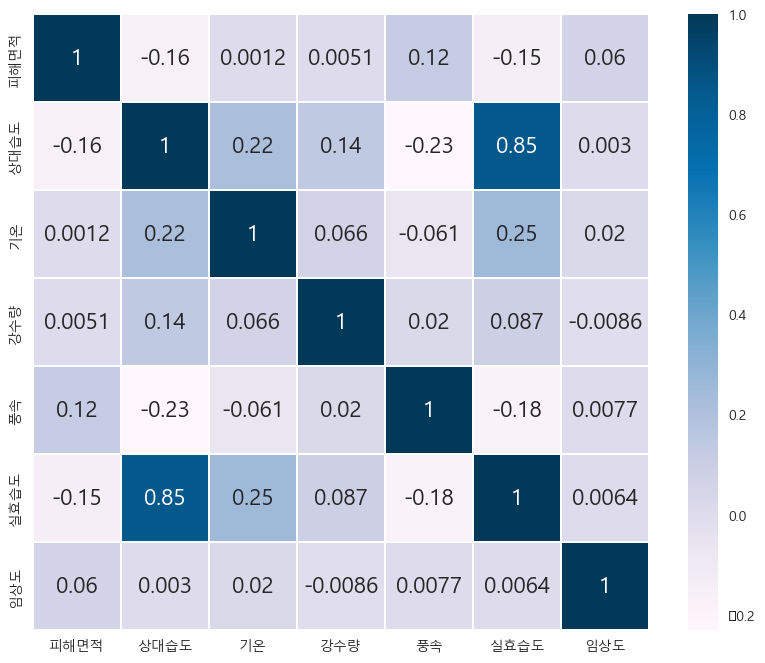

In [41]:
heatmap_data = data[['피해면적','상대습도', '기온', '강수량', '풍속', '실효습도','임상도']]
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

## 데이터 분할

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train=data

target = train['피해면적'][:len(train)]

print(train.shape, target.shape)

train.drop(['피해면적'],axis=1,inplace=True)

(4922, 22) (4922,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, stratify=target,random_state=42) 

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape )

(3937, 21) (985, 21) (3937,) (985,)


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   상대습도             4922 non-null   float64
 1   상대습도_1days_prev  4922 non-null   float64
 2   상대습도_2days_prev  4922 non-null   float64
 3   상대습도_3days_prev  4922 non-null   float64
 4   상대습도_4days_prev  4922 non-null   float64
 5   실효습도             4922 non-null   float64
 6   기온               4922 non-null   float64
 7   강수량              4922 non-null   float64
 8   풍속               4922 non-null   float64
 9   기온_1days_prev    4922 non-null   float64
 10  기온_2days_prev    4922 non-null   float64
 11  기온_3days_prev    4922 non-null   float64
 12  기온_4days_prev    4922 non-null   float64
 13  강수량_1days_prev   4922 non-null   float64
 14  강수량_2days_prev   4922 non-null   float64
 15  강수량_3days_prev   4922 non-null   float64
 16  강수량_4days_prev   4922 non-null   float64
 17  임상도           

# 모델링

## Randomforest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
prediction = model.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.38274111675126904


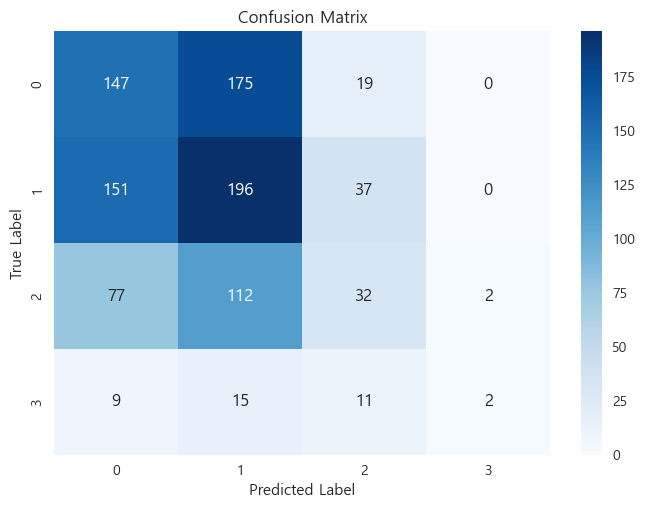

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.3828125  0.3935743  0.32323232 0.5       ]
Recall: [0.43108504 0.51041667 0.14349776 0.05405405]


In [49]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
print("f1_score:", f1)

f1_score: 0.3623155161837889


### 피쳐 중요도

Text(0.5, 0, 'RandomForest Feature Importance')

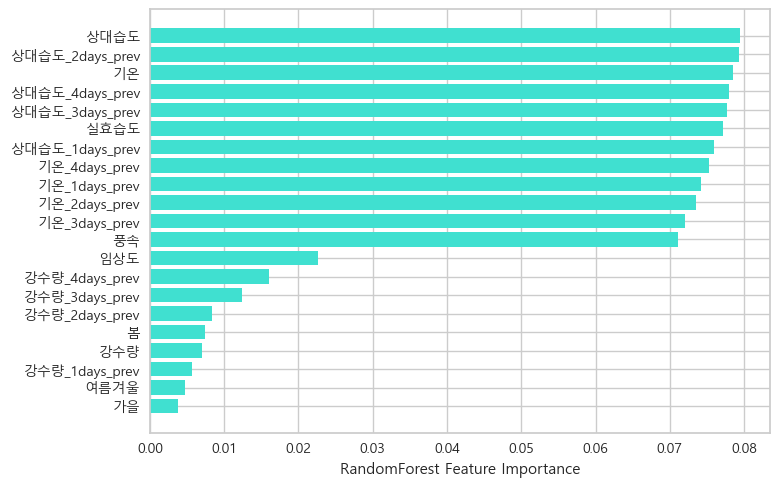

In [50]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("RandomForest Feature Importance")

## CatBoost

In [51]:
model1 = CatBoostClassifier(n_estimators=100,random_state=42)
model1.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 1.2638658	total: 137ms	remaining: 13.6s
1:	learn: 1.2056868	total: 141ms	remaining: 6.92s
2:	learn: 1.1726763	total: 144ms	remaining: 4.67s
3:	learn: 1.1551416	total: 148ms	remaining: 3.54s
4:	learn: 1.1435112	total: 151ms	remaining: 2.86s
5:	learn: 1.1294059	total: 155ms	remaining: 2.42s
6:	learn: 1.1202104	total: 164ms	remaining: 2.18s
7:	learn: 1.1138796	total: 167ms	remaining: 1.92s
8:	learn: 1.1080212	total: 170ms	remaining: 1.71s
9:	learn: 1.0997547	total: 173ms	remaining: 1.56s
10:	learn: 1.0957503	total: 176ms	remaining: 1.42s
11:	learn: 1.0872050	total: 179ms	remaining: 1.31s
12:	learn: 1.0809627	total: 182ms	remaining: 1.22s
13:	learn: 1.0749840	total: 185ms	remaining: 1.14s
14:	learn: 1.0646270	total: 190ms	remaining: 1.08s
15:	learn: 1.0590601	total: 193ms	remaining: 1.01s
16:	learn: 1.0557041	total: 196ms	remaining: 957ms
17:	learn: 1.0476218	total: 199ms	remaining: 908ms
18:	learn: 1.0432777	total: 202ms	remaining: 863ms
19:	learn: 1.038

In [52]:
prediction = model1.predict(X_test)
print("Accuracy is: ", accuracy_score(prediction, y_test))
acc_RF=accuracy_score(prediction, y_test)

Accuracy is:  0.39898477157360407


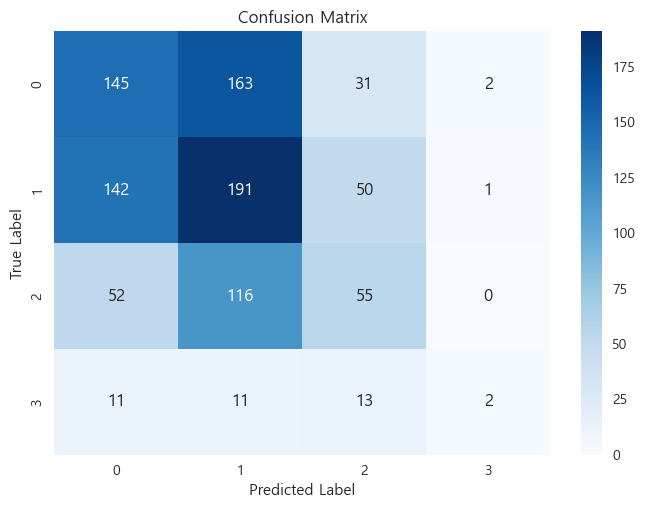

In [53]:
cm = confusion_matrix(y_test, prediction)

sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

precision = precision_score(y_test, prediction, average=None)
recall = recall_score(y_test, prediction, average=None)

print("Precision:", precision)
print("Recall:", recall)

Precision: [0.41428571 0.3970894  0.36912752 0.4       ]
Recall: [0.42521994 0.49739583 0.24663677 0.05405405]


In [55]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, prediction, average='weighted')
print("f1_score:", f1)

f1_score: 0.38797726429975593


### 피쳐 중요도

Text(0.5, 0, 'CatBoost Feature Importance')

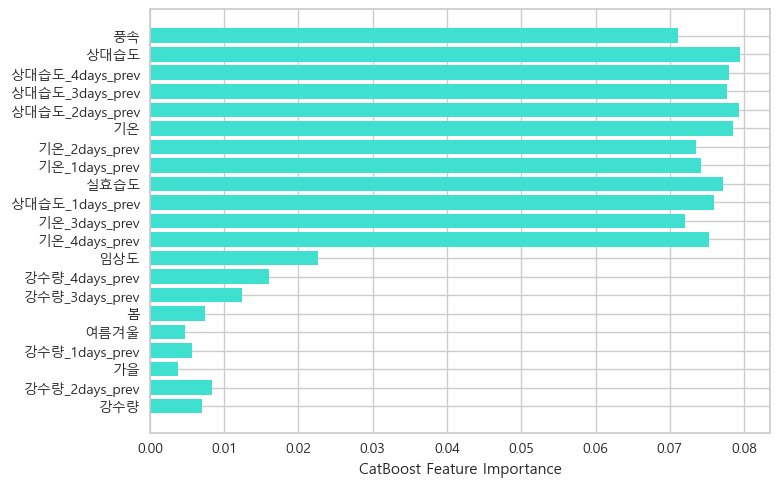

In [56]:
sorted_feature_importance = model1.feature_importances_.argsort()
plt.barh(X_test.columns[sorted_feature_importance],
        model.feature_importances_[sorted_feature_importance],
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

.

.